In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("/content/drive/MyDrive/FER2013/train/0/Training_3908.jpg")

In [4]:
img_array.shape

(48, 48, 3)

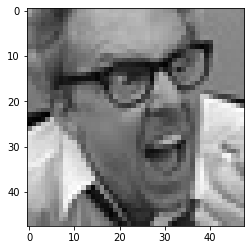

In [5]:
plt.imshow(img_array)

In [6]:
datadirectory = "/content/drive/MyDrive/FER2013/train/"

In [7]:
classes = ["0","1","2","3","4","5","6"]   ## LIST OF CLASSES

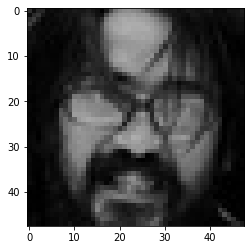

In [8]:
for category in classes:
  path = os.path.join(datadirectory , category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

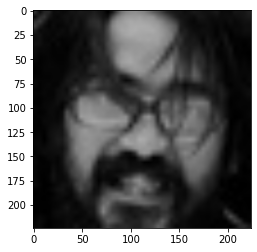

In [9]:
img_size = 224    #CHANGED THE SIZE FROM 48 X 48 TO 224 X 224 WHICH IS ACCEPTED BY TRANSFER LEARNING MODEL 
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

NOW READING ALL THE IMAGES AND CONVERTING THEM TO ARRAY

In [11]:
training_data = []
def create_training_Data():
  for category in classes:
    path = os.path.join(datadirectory , category)
    class_num = classes.index(category)   #Labeling or indexing
    for img in os.listdir(path):
       try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size , img_size))
            training_data.append([new_array , class_num])
       except Exception as e:
            pass  

In [12]:
create_training_Data()

In [13]:
print(len(training_data))

11774


In [14]:
import random
random.shuffle(training_data)

In [15]:
print(len((training_data)))

11774


In [16]:
x = []  # data / feature
y = [] #label / numbering

for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)  ## coverting x array to 4 Dimension array. because we are USING deep learning architecture such as mobileNet which takes 4D images 


In [17]:
type(x)

numpy.ndarray

In [18]:
x.shape


(11774, 224, 224, 3)

In [19]:
X= np.array(x)
Y= np.array(y)

#DEEP LEARNING MODEL FOR TRAINING - TRANSFER LEARNING

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten


In [21]:
model = tf.keras.applications.MobileNetV2()     ##mobileNet is a pre-trained model

14548992/14536120 [==============================] - 1s 0us/step


In [ ]:
model.summary()

# TRANSFER LEARNING - TUNING , WEIGHTS WILL START FROM LAST CHECK POINT

In [23]:
base_input = model.layers[0].input    ##input layer

In [24]:
base_output = model.layers[-2].output

In [25]:
base_output   ##last row was deleted, coz they were unneccessary

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [26]:
final_output = layers.Dense(128)(base_output)   ## global pooling layer.
## adding new layer after the output of global pooling layer.
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)   ## Classification layer
    ## output layer

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

In [30]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
history = new_model.fit(X, Y, batch_size=32, epochs=35, validation_split=0.1) 

Epoch 1/35
332/332 [==============================] - 84s 204ms/step - loss: 0.8448 - accuracy: 0.6458 - val_loss: 4.5373 - val_accuracy: 0.3981
Epoch 2/35
332/332 [==============================] - 68s 205ms/step - loss: 0.6863 - accuracy: 0.7199 - val_loss: 1.4990 - val_accuracy: 0.4626
Epoch 3/35
332/332 [==============================] - 68s 205ms/step - loss: 0.6104 - accuracy: 0.7530 - val_loss: 2.2415 - val_accuracy: 0.4907
Epoch 4/35
332/332 [==============================] - 68s 204ms/step - loss: 0.5470 - accuracy: 0.7837 - val_loss: 4.4494 - val_accuracy: 0.3854
Epoch 5/35
332/332 [==============================] - 70s 210ms/step - loss: 0.5033 - accuracy: 0.8001 - val_loss: 2.0124 - val_accuracy: 0.5127
Epoch 6/35
332/332 [==============================] - 68s 206ms/step - loss: 0.4589 - accuracy: 0.8183 - val_loss: 2.7272 - val_accuracy: 0.5102
Epoch 7/35
332/332 [==============================] - 67s 201ms/step - loss: 0.4020 - accuracy: 0.8421 - val_loss: 1.6421 - val_ac

In [32]:
new_model.save('/content/drive/MyDrive/final_modell2_95p07.h5')

In [33]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/final_modell2_95p07.h5')

In [34]:
frame=cv2.imread("/content/drive/MyDrive/11.jpg")

In [35]:
frame = np.array(frame)

In [36]:
frame.shape

(382, 600, 3)

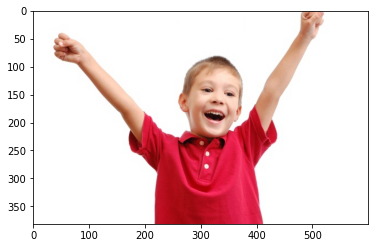

In [37]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [38]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape


(382, 600)

In [41]:
faces =faceCascade.detectMultiScale(gray,1.1,4)  ##open cv code, find all possible faces in a photo, and can also detect multiple faces
for x,y,w,h in faces:
    roi_gray =gray[y:y+h,x:x+w]
    roi_color =frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (224,0,0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(faces) ==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi =roi_color[ey: ey+eh, ex:ex +ew]


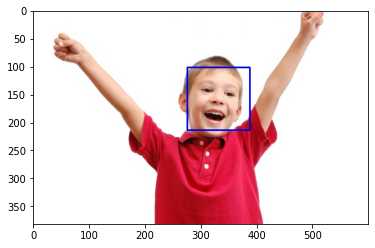

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

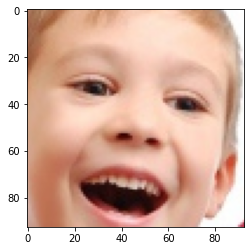

In [43]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [44]:
final_image=cv2.resize(face_roi,(224,224))  ##face_roi is rgb
final_image =np.expand_dims(final_image,axis=0)  #need 4th dimensions

In [45]:
Predictions=new_model.predict(final_image)

In [46]:
Predictions[0]


array([4.10717163e-12, 6.99903986e-17, 1.35573575e-11, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32)

In [47]:
type(Predictions)

numpy.ndarray

In [48]:
Predictions.shape

(1, 7)

In [49]:
result = np.argmax(Predictions)
result

3